## Database filtering

Data filtering the visual database related to rat's behavior - removal of movement interrupting acuity tests:
1. Rearing
2. Scratching
3. Moving around

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/'

dfrat = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')

hyperparam = { 'BPFlimit' : 0.5 ,
               'LPFlimit' : 0.13,
               'MOVElimit': 0.02,}


## Rearing removal
Removal based on Y axis postion limit - low pass filter

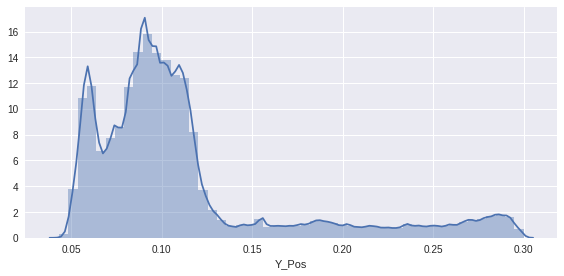

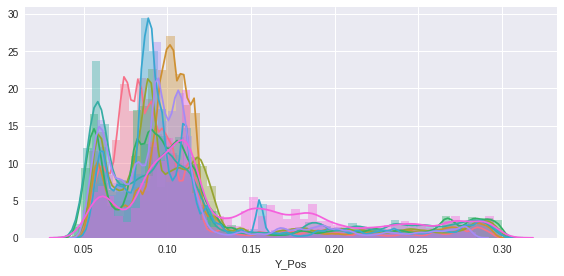

In [2]:
g = sns.FacetGrid(data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

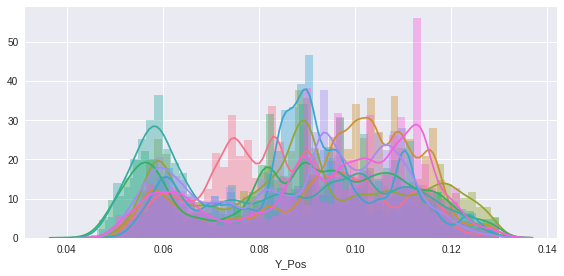

In [3]:
# Low pass filetring of Y position
rearinglimit = 0.13
dfratnew = dfrat[dfrat['Y_Pos'] < rearinglimit]

# Plotting after filtering
g = sns.FacetGrid(hue='session_id', data=dfratnew, size=4, aspect=2)
g.map(sns.distplot, 'Y_Pos');

## Scratching and cleaning removal
Removal based on Y axis orientation limit - band pass filter

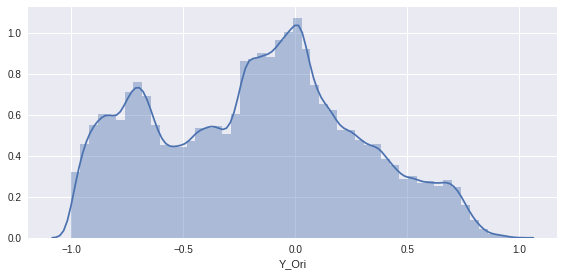

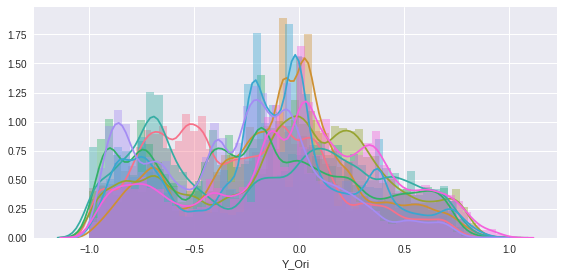

In [5]:
g = sns.FacetGrid(data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

g = sns.FacetGrid(hue='session_id', data=dfrat, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

# add line on plots with filter val

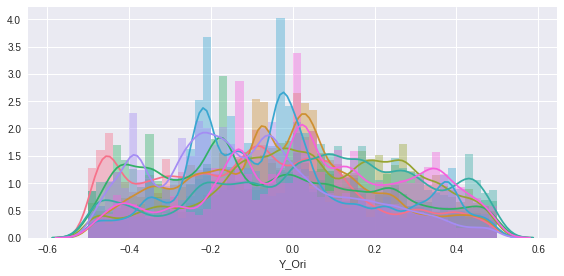

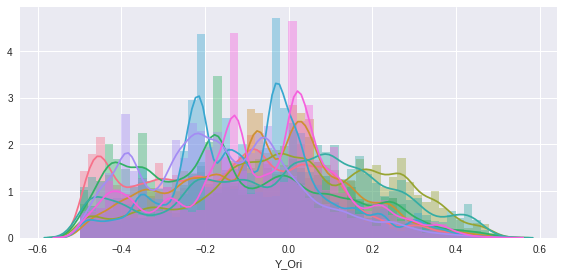

In [6]:
# Band pass filetring of Y orientation
orientylimit = 0.5
dfratnew2 = dfrat[np.absolute(dfrat['Y_Ori']) < orientylimit]
dfratnew3 = dfratnew[np.absolute(dfratnew['Y_Ori']) < orientylimit]

# Plotting after filtering
g = sns.FacetGrid(hue='session_id', data=dfratnew2, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');
g = sns.FacetGrid(hue='session_id', data=dfratnew3, size=4, aspect=2)
g.map(sns.distplot, 'Y_Ori');

In [49]:
# g = sns.FacetGrid(hue='session_id', data=dfratnew[dfratnew['session_id']==1], size=6, aspect=2.5)
#g.map(sns.regplot, 'Time', 'Y_Pos', scatter_kws={'s':2}, fit_reg=False);
# g.map(plt.plot, "Time", "Y_Pos", alpha=1, linewidth=0.8);
# g = sns.FacetGrid(hue='session_id', data=dfratnew[dfratnew['session_id']==1], size=6, aspect=2.5)
# g.map(plt.plot, "Time", "Y_Ori", alpha=1, linewidth=0.8, color='r');

#g = sns.FacetGrid(hue='session_id', data=dfratnew[dfratnew['session_id']==1], size=6, aspect=2.5)
# g = sns.FacetGrid(hue='session_id', data=dfratnew, size=6, aspect=2.5)
# g.map(sns.regplot, 'Y_Pos', 'Y_Ori', scatter_kws={'s':2.5}, fit_reg=False);

## Smoothing the data
Rolling window applyed on X, Y, Z positiona and orientation data.

In [54]:
dfrat.size

11525958

In [23]:
windowsize = 1000
DT = {}
df = pd.DataFrame()

for i in range(0,8):
    DT[i] = dfrat.copy().groupby(['session_id']).get_group(i)
    DT[i]['X_Pos'] = DT[i]['X_Pos'].rolling(window=windowsize).mean()
    DT[i]['Y_Pos'] = DT[i]['Y_Pos'].rolling(window=windowsize).mean()
    DT[i]['Z_Pos'] = DT[i]['Z_Pos'].rolling(window=windowsize).mean()

    DT[i]['X_Ori'] = DT[i]['X_Ori'].rolling(window=windowsize).mean()
    DT[i]['Y_Ori'] = DT[i]['Y_Ori'].rolling(window=windowsize).mean()
    DT[i]['Z_Ori'] = DT[i]['Z_Ori'].rolling(window=windowsize).mean()

    df = pd.concat([df, DT[i]], axis=0, ignore_index=True)


In [ ]:
df[['X_Pos', 'Y_Pos']].rolling(window=10)

In [55]:
g = dfrat.groupby('session_id')
g[['X_Pos', 'Y_Pos']].rolling(10).mean()

In [24]:
## DATASETS FOR VISUALIZATION
pos_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension')

ori_l = dfrat.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Orientation', value_vars=['X_Ori', 'Y_Ori', 'Z_Ori'], var_name='Dimension')

# smoothed data
pos_lSM = df.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Position', value_vars=['X_Pos', 'Y_Pos', 'Z_Pos'], var_name='Dimension')

ori_lSM = df.melt(id_vars=['Frame', 'Time', 'session_id'], 
           value_name='Orientation', value_vars=['X_Ori', 'Y_Ori', 'Z_Ori'], var_name='Dimension')


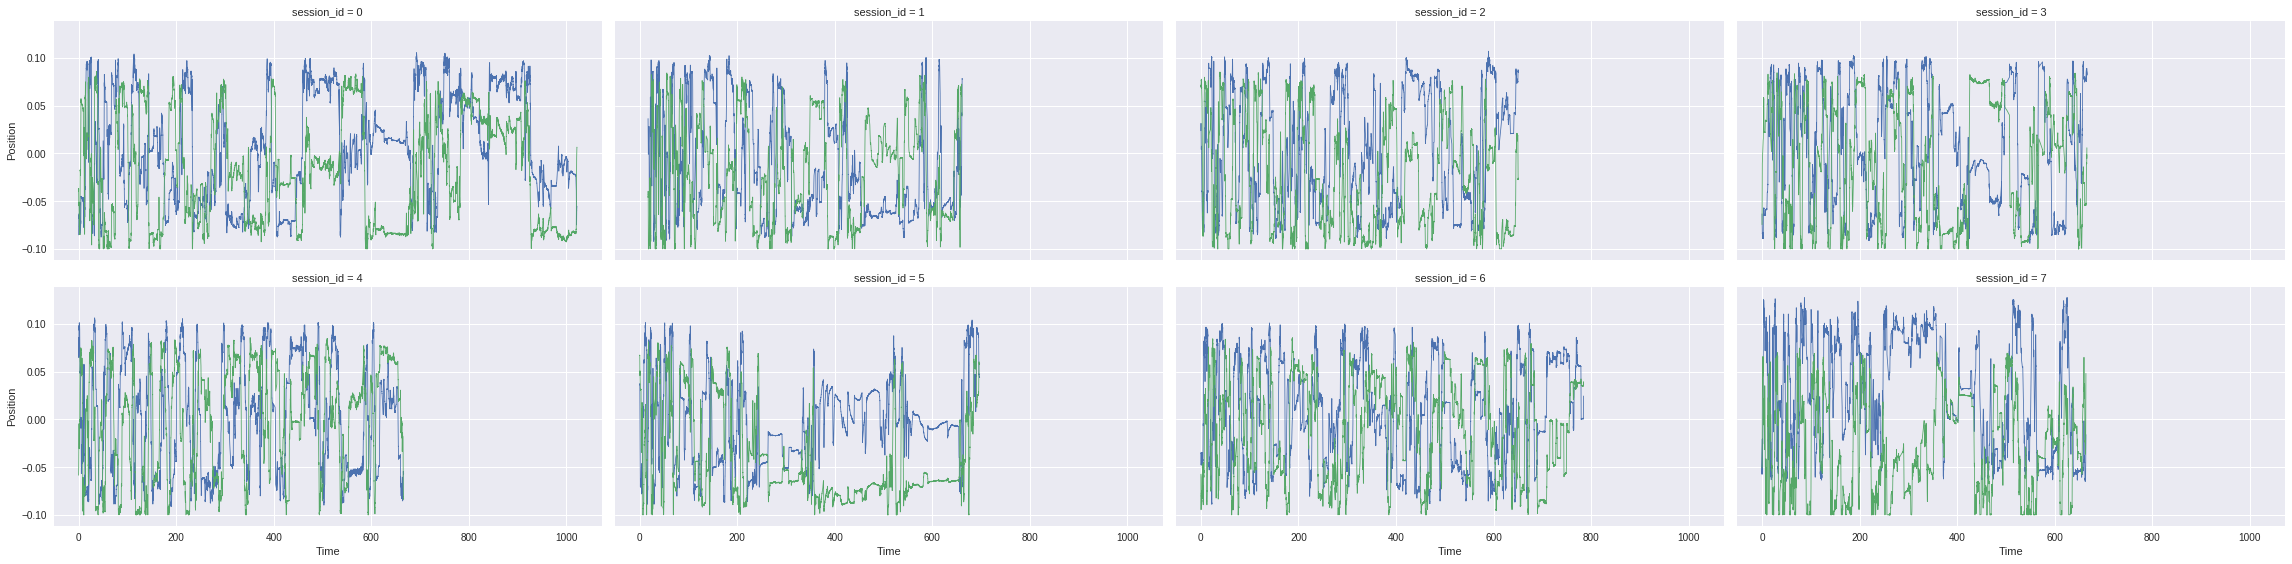

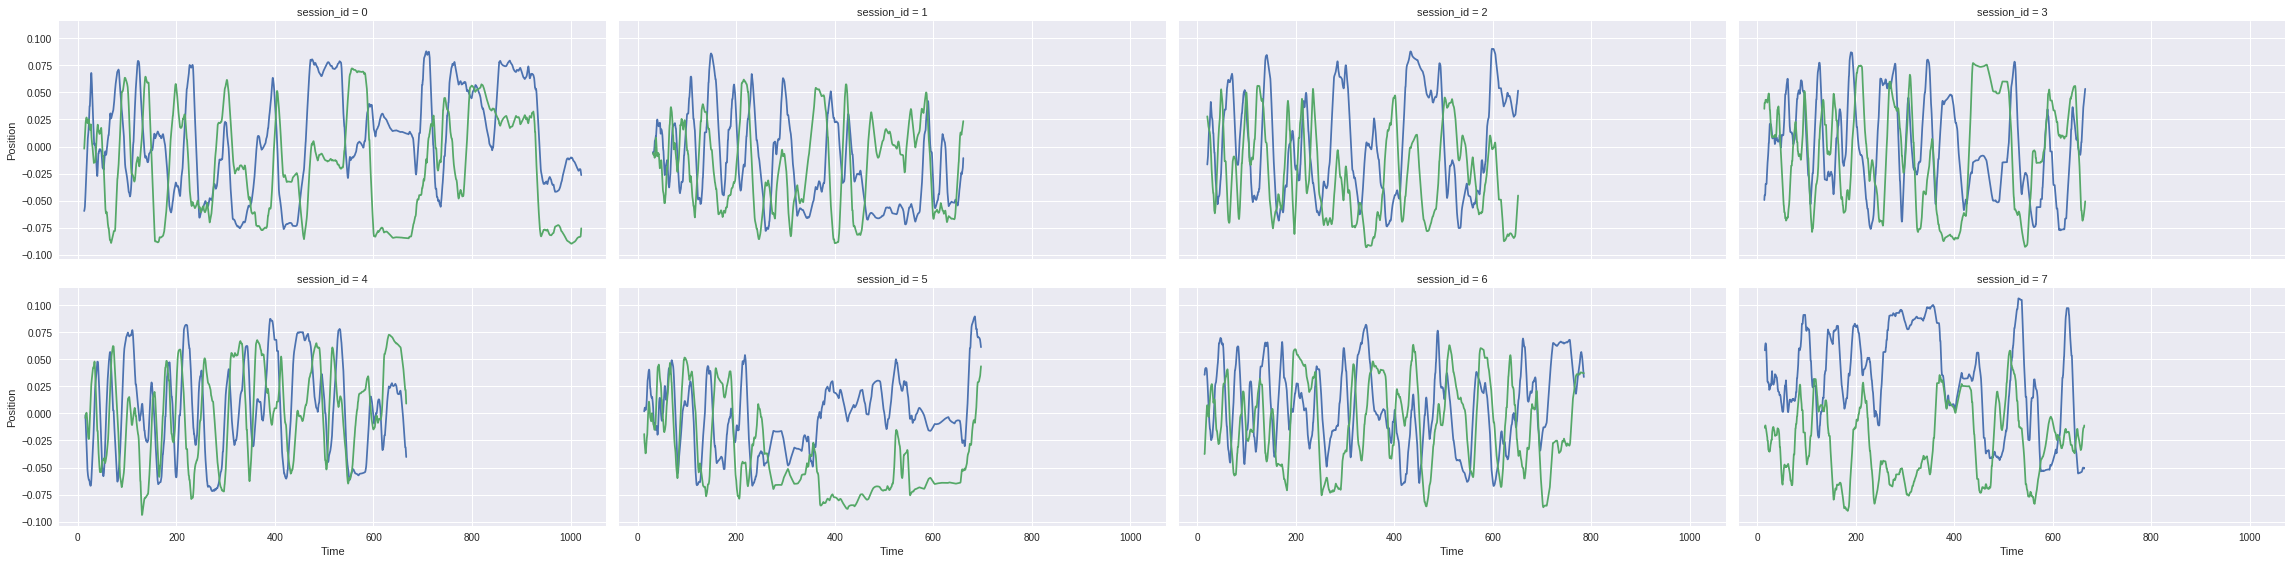

In [51]:
# plotting position before and after smoothing
g = sns.FacetGrid(col='session_id', hue='Dimension', data=pos_l, size=4, aspect=2, col_wrap=4, hue_order=['X_Pos', 'Z_Pos'])
g.map(plt.plot, "Time", "Position", alpha=1, linewidth=0.8);

g = sns.FacetGrid(col='session_id', hue='Dimension', data=pos_lSM, size=4, aspect=2, col_wrap=4, hue_order=['X_Pos', 'Z_Pos'])
g.map(plt.plot, "Time", "Position", alpha=1);


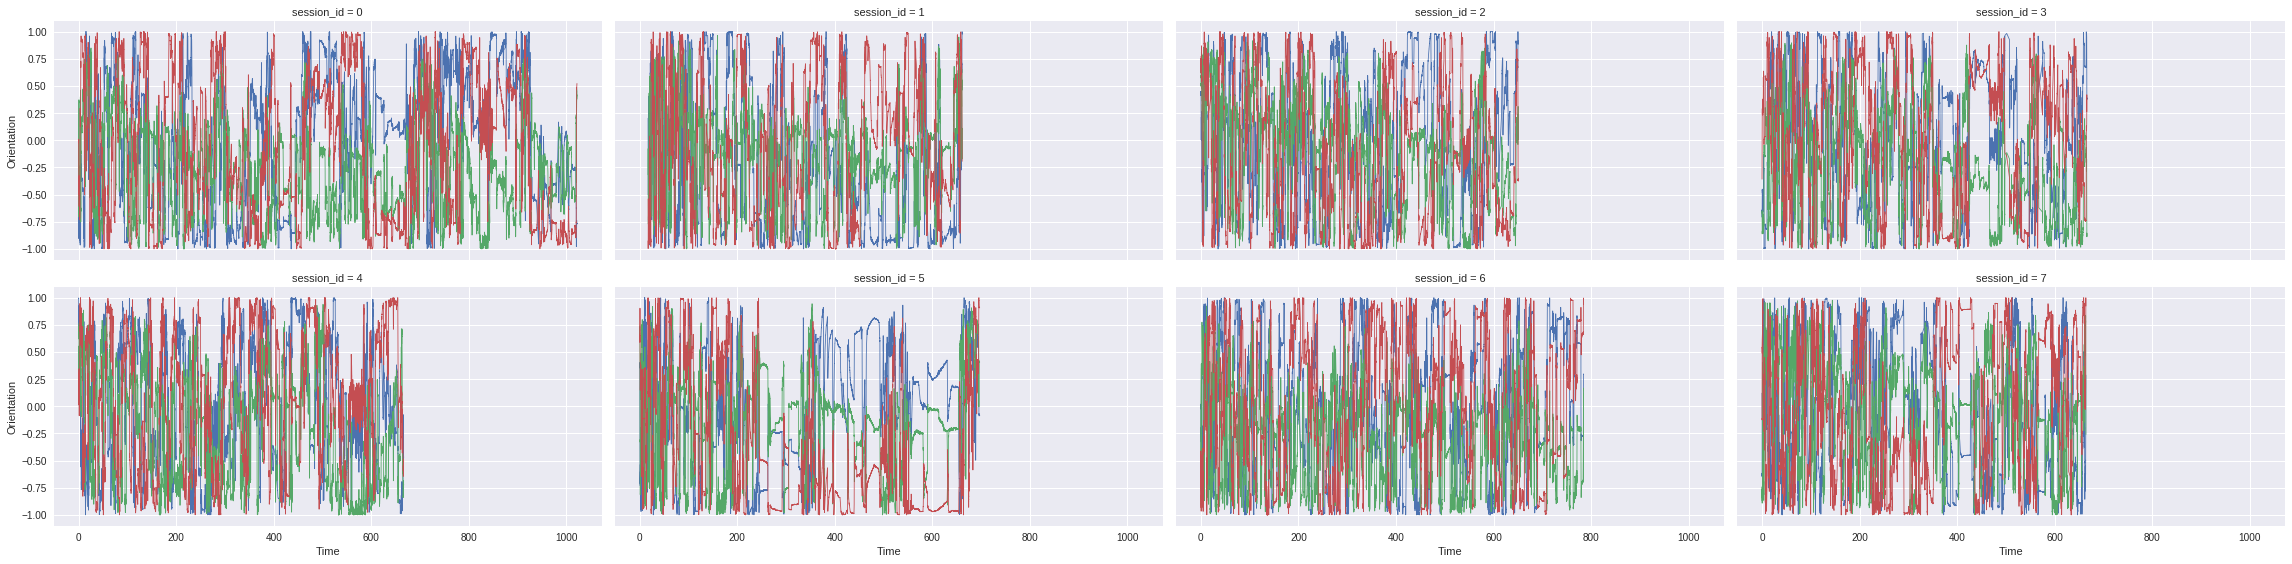

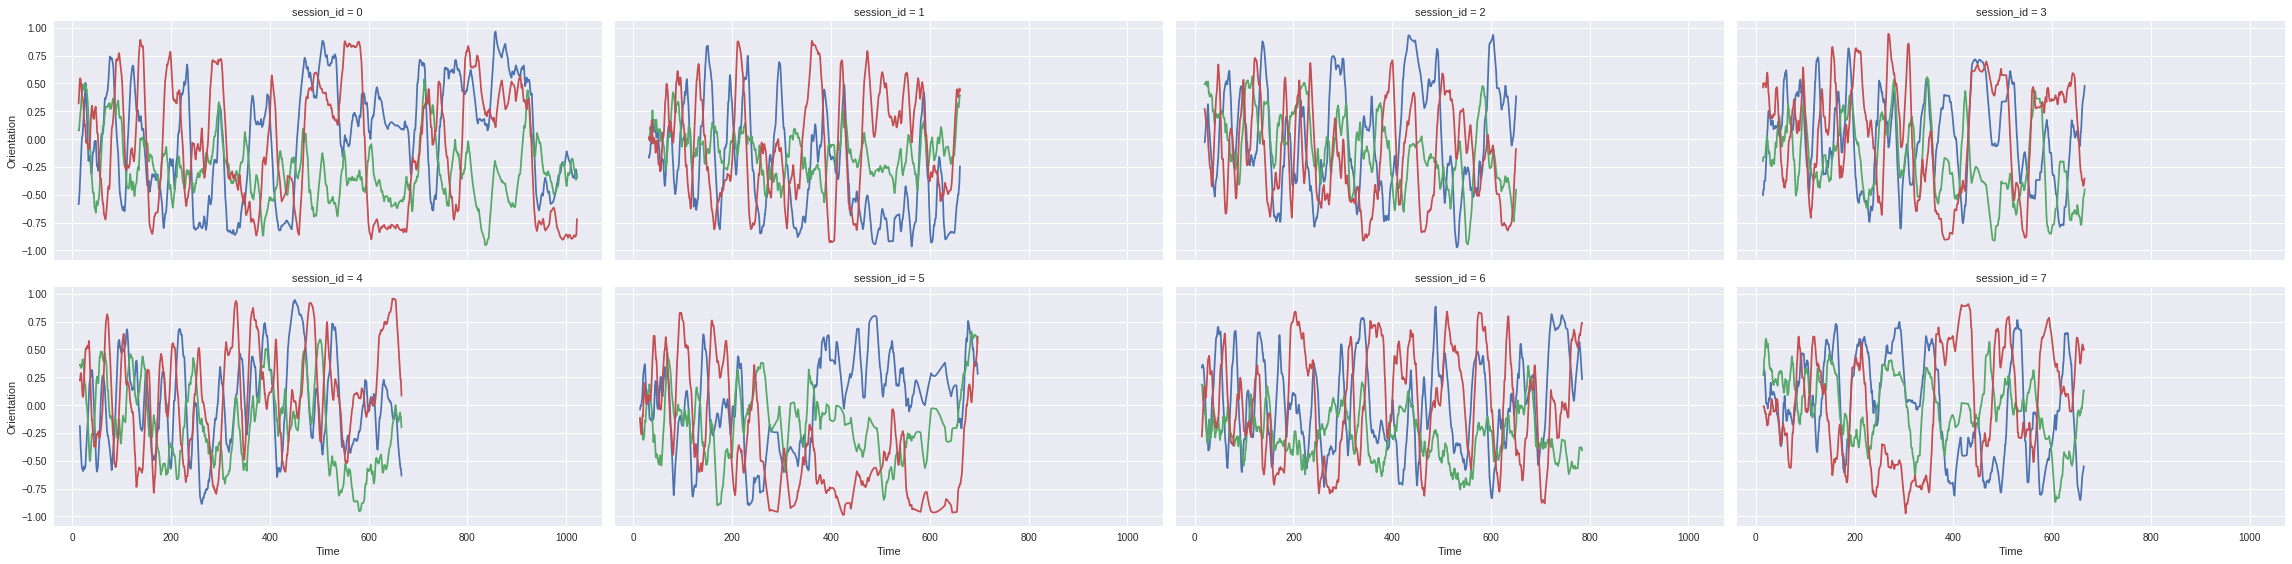

In [50]:
# plotting orientation before and after smoothing
g = sns.FacetGrid(col='session_id', hue='Dimension', data=ori_l, size=4, aspect=2, col_wrap=4)
g.map(plt.plot, "Time", "Orientation", alpha=1, linewidth=0.8);

g = sns.FacetGrid(col='session_id', hue='Dimension', data=ori_lSM, size=4, aspect=2, col_wrap=4)
g.map(plt.plot, "Time", "Orientation", alpha=1);


## Distribution

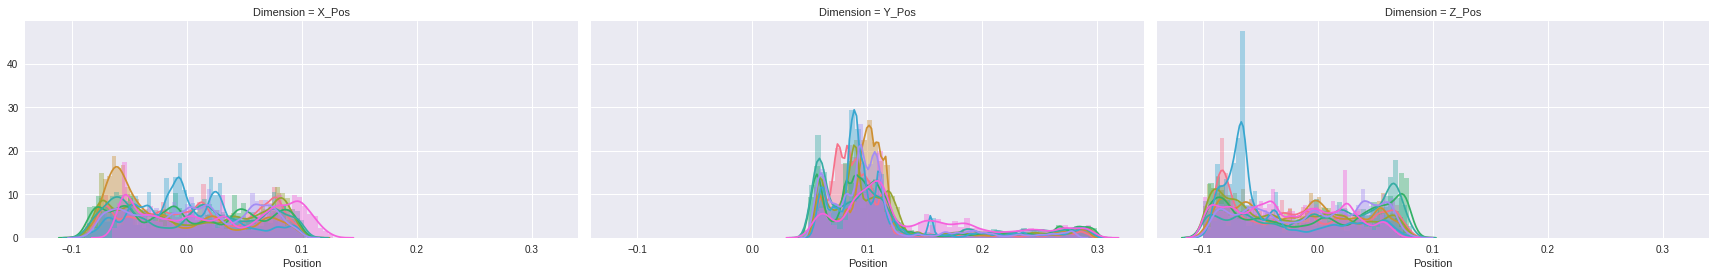

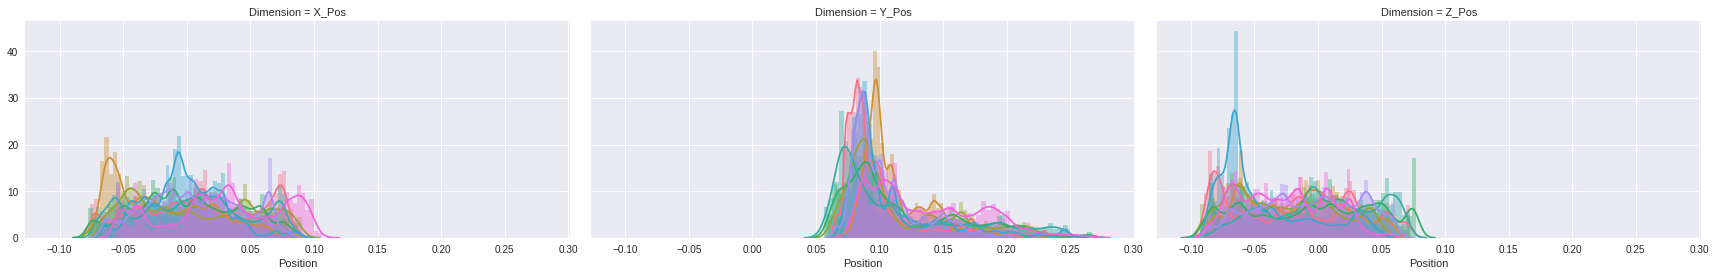

In [28]:
g = sns.FacetGrid(hue='session_id', col='Dimension', data=pos_l, size=4, aspect=2)
g.map(sns.distplot, 'Position');

g = sns.FacetGrid(hue='session_id', col='Dimension', data=pos_lSM, size=4, aspect=2)
g.map(sns.distplot, 'Position');

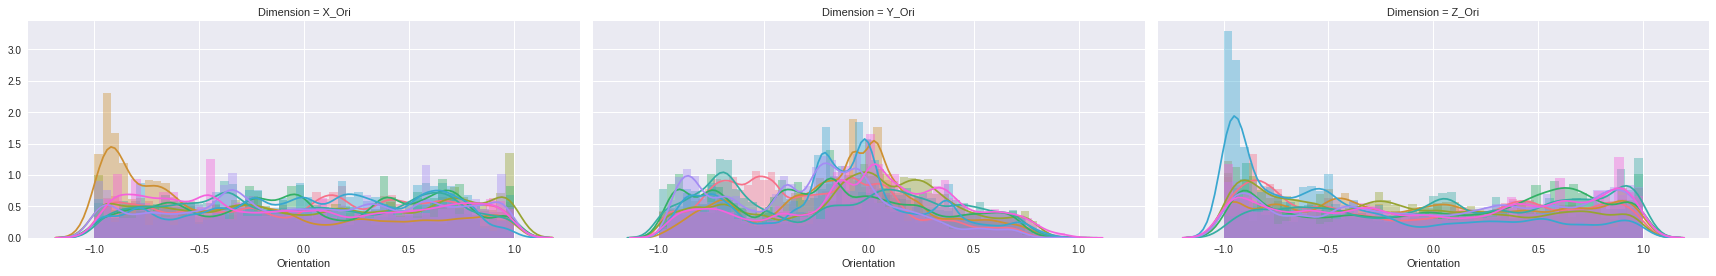

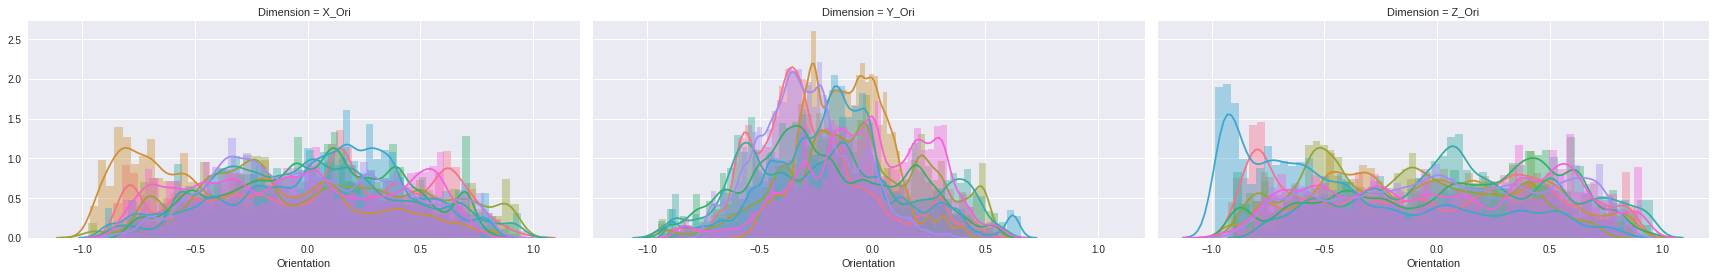

In [29]:
g = sns.FacetGrid(hue='session_id', col='Dimension', data=ori_l, size=4, aspect=2)
g.map(sns.distplot, 'Orientation');

g = sns.FacetGrid(hue='session_id', col='Dimension', data=ori_lSM, size=4, aspect=2)
g.map(sns.distplot, 'Orientation');


# Head Velocity
Notebook for clean attempt of checking the distribution of head velocity including the direction.

## Velocity - rapid movement removal
Removal based on speed of changes in the position of the animal - low pass filter of diagonal velocity.

In [44]:
#extraction of speed of positon changes and calculating velocity in all axes
windowsize = 3000
DT1 = {}
df1 = pd.DataFrame()

for i in range(0,8):
    DT1[i] = df.copy().groupby(['session_id']).get_group(i)
    
    DT1[i]['dT'] = DT1[i]['Time'].diff(-1)
    
    DT1[i]['dX_Pos'] = DT1[i]['X_Pos'].diff(-1)
    DT1[i]['dY_Pos'] = DT1[i]['Y_Pos'].diff(-1)
    DT1[i]['dZ_Pos'] = DT1[i]['Z_Pos'].diff(-1)

    DT1[i]['VX_Pos'] = DT1[i]['dX_Pos'] / DT1[i]['dT']
    DT1[i]['VY_Pos'] = DT1[i]['dY_Pos'] / DT1[i]['dT']
    DT1[i]['VZ_Pos'] = DT1[i]['dZ_Pos'] / DT1[i]['dT']

    DT1[i]['Vxyz'] = np.linalg.norm(DT1[i][['VX_Pos','VY_Pos','VZ_Pos']].values,axis=1) # diagonal velocity
    DT1[i]['Vxyz'] = np.linalg.norm(DT1[i][['VX_Pos','VY_Pos','VZ_Pos']].values,axis=1) # diagonal velocity
    df1 = pd.concat([df1, DT1[i]], axis=0, ignore_index=True)

df1 = df1.replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:
for i in mylist:
    el = mylist[i]

In [57]:
for name, dd in df.groupby('session_id'):
    print(name)

0
1
2
3
4
5
6
7


In [45]:
df1.max()

Frame         245230.000000
Time            1021.791732
X_Pos              0.106150
Y_Pos              0.268455
Z_Pos              0.077099
session_id         7.000000
X_Ori              0.966275
Y_Ori              0.659612
Z_Ori              0.956757
dT                -0.004166
dX_Pos             0.000062
dY_Pos             0.000083
dZ_Pos             0.000061
VX_Pos             0.014983
VY_Pos             0.020450
VZ_Pos             0.014549
Vxyz               0.024770
dtype: float64

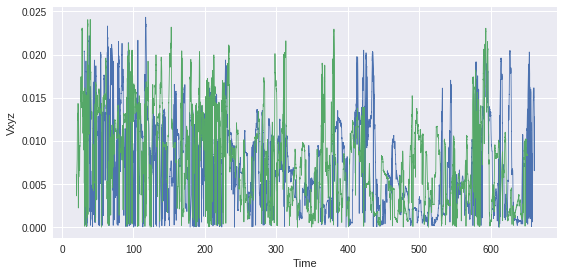

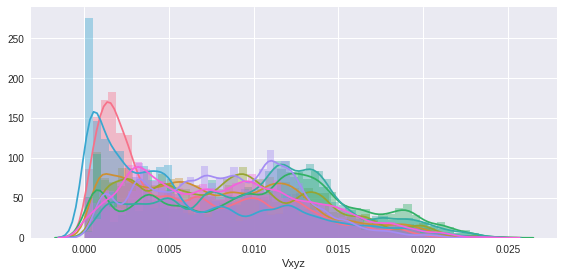

In [46]:
g = sns.FacetGrid(hue='session_id', data=df1, size=4, aspect=2, hue_order=[1,2])
g.map(plt.plot, "Time", "Vxyz", alpha=1, linewidth=0.8);

g = sns.FacetGrid(hue='session_id', data=df1, size=4, aspect=2)
g.map(sns.distplot, 'Vxyz');


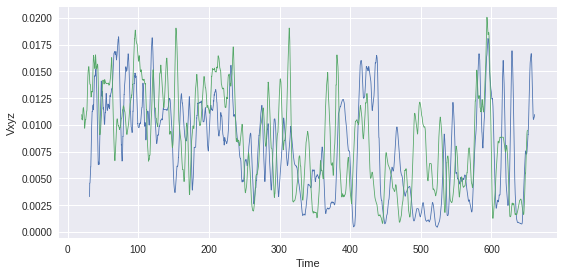

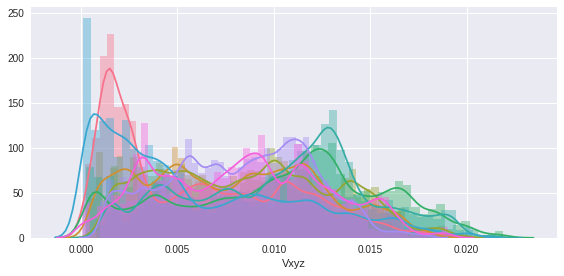

In [47]:
dft = df1.copy()
dft['Vxyz'] = dft['Vxyz'].rolling(window=1000).mean()

g = sns.FacetGrid(hue='session_id', data=dft, size=4, aspect=2, hue_order=[1,2])
g.map(plt.plot, "Time", "Vxyz", alpha=1, linewidth=0.8);

g = sns.FacetGrid(hue='session_id', data=dft, size=4, aspect=2)
g.map(sns.distplot, 'Vxyz');
